In [467]:
# importing packages
from understatscraper import Understat
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import warnings
from highlight_text import fig_text
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
import numpy as np

In [3]:
# instance of the class

understat = Understat()

### Seasons of Batshuayi between 2015 and 2021

- 2015-16 Ligue 1 Marseille
- 2016-18 EPL Chelsea
- 2017-18 Bundesliga Borussia Dortmund (half season loan)
- 2018-19 La Liga Valencia (half season loan)
- 2018-19 EPL Crystal Palace (half season loan)
- 2019-20 EPL Chelsea
- 2020-21 EPL Crystal Palace

In [57]:
ligues = ['Ligue 1','EPL','EPL','Bundesliga','La liga','EPL','EPL','EPL']
seasons = [2015,2016,2017,2017,2018,2018,2019,2020]

In [257]:
# creating dataframe by iterating through two lists
df = pd.DataFrame()
for l,s in zip(ligues,seasons):
    df_b = understat.season(l,s,player="Michy Batshuayi")
    df = df.append(df_b)

### Inspecting dataframe

In [258]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,61453,7,MissedShots,0.8730000305175781,0.5829999923706055,0.12163817882537842,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Throughball
2,61458,25,BlockedShot,0.909000015258789,0.675,0.06413242965936661,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Florian Thauvin,Pass
3,61460,29,SavedShot,0.919000015258789,0.555,0.08026830852031708,Michy Batshuayi,h,1678,FromCorner,2015,Head,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Cross
5,61462,38,BlockedShot,0.9230000305175782,0.48200000762939454,0.5214341878890991,Michy Batshuayi,h,1678,FromCorner,2015,RightFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,None,None
11,61709,82,MissedShots,0.7559999847412109,0.39799999237060546,0.01823040470480919,Michy Batshuayi,a,1678,OpenPlay,2015,RightFoot,1886,Reims,Marseille,1,0,2015-08-16 16:00:00,None,TakeOn


In [259]:
# resetting index
df.reset_index(drop=True,inplace=True)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               253 non-null    object
 1   minute           253 non-null    object
 2   result           253 non-null    object
 3   X                253 non-null    object
 4   Y                253 non-null    object
 5   xG               253 non-null    object
 6   player           253 non-null    object
 7   h_a              253 non-null    object
 8   player_id        253 non-null    object
 9   situation        253 non-null    object
 10  season           253 non-null    object
 11  shotType         253 non-null    object
 12  match_id         253 non-null    object
 13  h_team           253 non-null    object
 14  a_team           253 non-null    object
 15  h_goals          253 non-null    object
 16  a_goals          253 non-null    object
 17  date             253 non-null    ob

In [261]:
# backup
df2 = df.copy()

In [267]:
df['X'] = pd.to_numeric(df['X'])*100
df['Y'] = pd.to_numeric(df['Y'])*100
df['xG'] = pd.to_numeric(df['xG'])

In [269]:
df.xG.sum()

39.91443486139178

In [233]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
Name: result, dtype: int64

In [380]:
df = df[df['result']!='OwnGoal'] 

In [199]:
df.reset_index(drop=True,inplace=True)

In [92]:
df[df['result'] == 'Goal']['shotType'].value_counts()

RightFoot    20
LeftFoot     16
Head          4
Name: shotType, dtype: int64

In [234]:
df[df['result'] == 'Goal']['situation'].value_counts()

OpenPlay      33
FromCorner     3
Penalty        2
SetPiece       2
Name: situation, dtype: int64

In [101]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
Name: result, dtype: int64

In [381]:
df = df[df['situation']!='Penalty'].reset_index(drop=True)

In [382]:
df_missed = df[df['result']=='MissedShots'].reset_index(drop=True)
df_saved = df[df['result']=='SavedShot'].reset_index(drop=True)
df_blocked = df[df['result']=='BlockedShot'].reset_index(drop=True)
df_goal = df[df['result']=='Goal'].reset_index(drop=True)
df_post = df[df['result']=='ShotOnPost'].reset_index(drop=True)

In [393]:
df[df.season=='2015']['xG'].sum()

17.055521555244923

In [411]:
mins_90 = 6509/90

In [419]:
np_xGper90 = round(df['xG'].sum()/mins_90,2)

In [435]:
conversion = round(len(df_goal)/len(df),2)

In [442]:
np_xGperShot = round(df['xG'].sum()/len(df),2)

In [445]:
shot90 = round(len(df)/mins_90,2)

### Shotmap

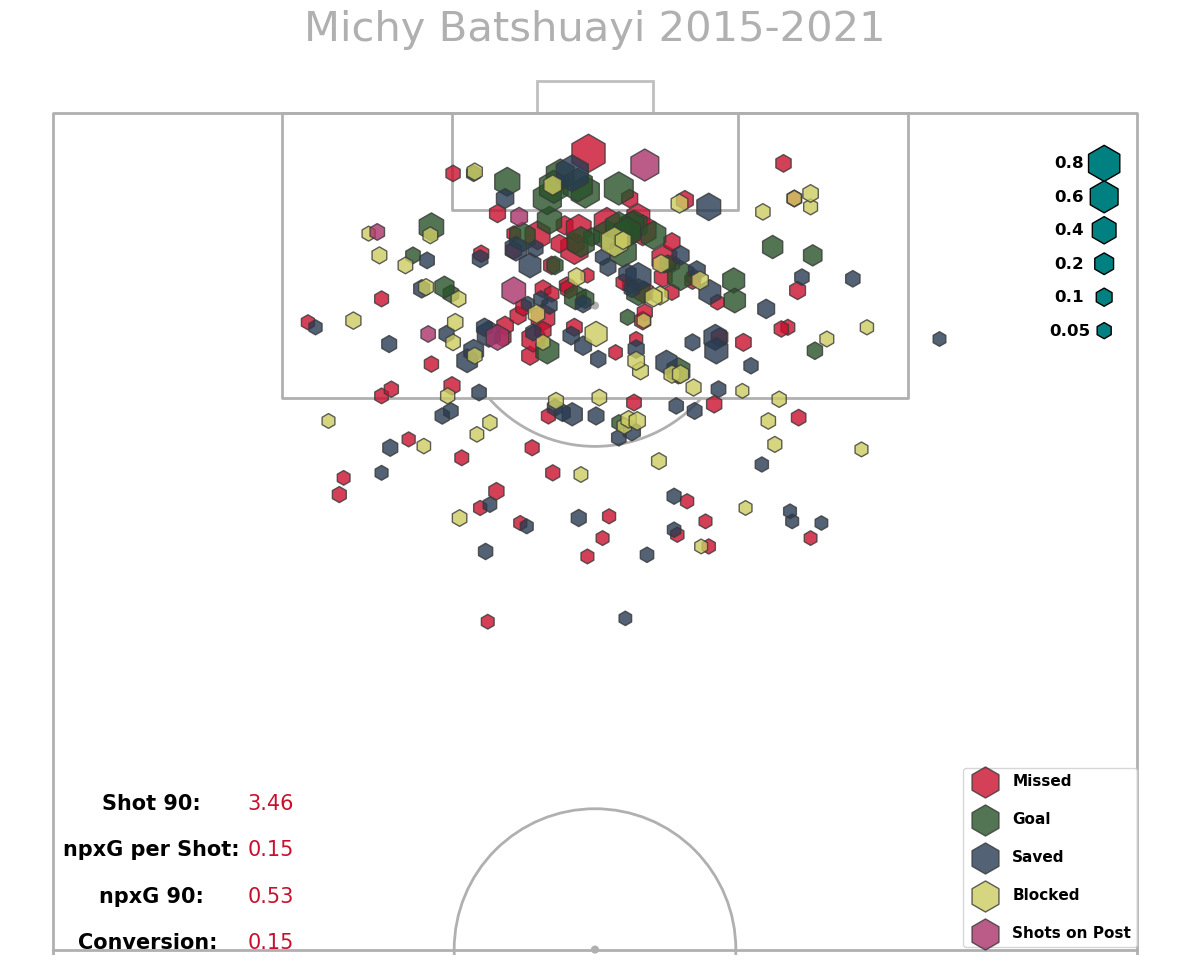

In [561]:
pitch = VerticalPitch(pad_bottom=0.5,
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                     pitch_type='opta')

fig, ax = pitch.draw(figsize=(12, 10))

re = pitch.scatter(df_missed['X'],df_missed['Y'],
                   s=(df_missed["xG"] * 720)+100,
                   alpha=.8,
                   c='#C8102E', 
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Missed",
                   ax=ax)

re1 = pitch.scatter(df_goal["X"],df_goal["Y"],
                   s=(df_goal["xG"] * 720)+100,
                   alpha=.8,
                   c='#285229',
                   edgecolors='#383838',
                   marker='h',label="Goal",
                   ax=ax)

re2 = pitch.scatter(df_saved["X"],df_saved["Y"],
                   s=(df_saved["xG"] * 720)+100,
                   alpha=.8,
                   c='#283b52',
                   edgecolors='#383838',
                   marker='h',label="Saved",
                   ax=ax)

re3 = pitch.scatter(df_blocked["X"],df_blocked["Y"],
                   s=(df_blocked["xG"] * 720)+100,
                   alpha=.8,
                   c='#cccc62',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Blocked")

re4 = pitch.scatter(df_post["X"],df_post["Y"],
                   s=(df_post["xG"] * 720)+100,
                   alpha=.8,
                   c='#AA336A',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Shots on Post")

#making legends equal size
legend = ax.legend(bbox_to_anchor=(0.97, 0.22),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]
legend.legendHandles[4]._sizes = [500]


txt = ax.text(x=50, y=105, s='Michy Batshuayi 2015-2021',
              size=30,
              color=pitch.line_color,
              va='center', ha='center')

mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]
mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]
plt.scatter(mx,my,s=mSizeS,facecolors="teal", edgecolor="black",marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+ 3.2, my[i], mSize[i], fontsize=12, c="black",ha="center", va="center",fontweight='bold')

fig.text(x=0.13, y=0.13, s='Shot 90:\n\nnpxG per Shot:\n\nnpxG 90:\n\nConversion: ' , va='center',
                  ha='center', size=15, c='black',fontweight="bold")

fig.text(x=0.23, y=0.13, s="{}\n\n{}\n\n{}\n\n{}".format(shot90,np_xGperShot,np_xGper90,conversion), va='center',
                  ha='center', size=15, color='#C8102E')

plt.show()

### xG Flow Chart

In [470]:
df['Goal'] = np.where(df['result']=='Goal',1,0)

In [476]:
goals_bats = df['Goal'].cumsum().tolist()
xG_bats = df['xG'].cumsum().tolist()

In [486]:
df['date'] = pd.to_datetime(df['date'])

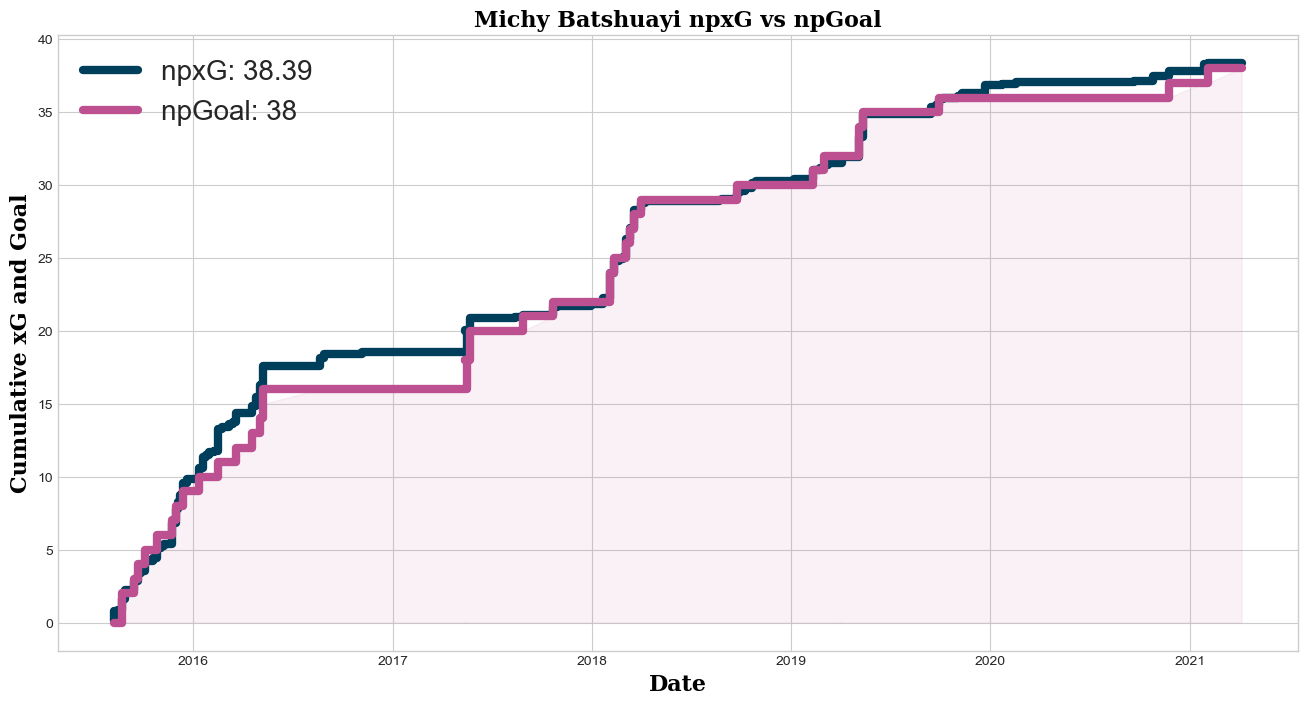

In [624]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(figsize = (16,8))


ax.step(x = df['date'] ,y = xG_bats, c = '#003f5c' ,linewidth = 6)
ax.step(x = df['date'] ,y = goals_bats, c = '#bc5090' ,linewidth = 6)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal',fontdict=font)
plt.title('Michy Batshuayi npxG vs npGoal',fontdict=font)

plt.fill_between(df['date'],goals_bats, alpha=0.08, color='#bc5090')

ax.legend(['npxG: {}'.format(round(max(xG_bats),2)), 'npGoal: {}'.format(max(goals_bats))],loc="best",fontsize=20)


plt.show()